<a href="https://colab.research.google.com/github/Mariam-Elbishbeashy/ANA_AI_Models/blob/main/text_dataset_model/LSTM_%2BCNN_FOR_NEW_DATASET_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📥 Loading dataset...
Dataset size after cleaning: (360000, 2)
✅ Dataset balanced
inner_character
Controller          20000
Neglected Part      20000
Dependent Part      20000
Overeater/Binger    20000
Workaholic          20000
People-Pleaser      20000
Fearful Part        20000
Lonely Part         20000
Procrastinator      20000
Excessive Gamer     20000
Ashamed Part        20000
Stoic Part          20000
Confused Part       20000
Jealous Part        20000
Overwhelmed Part    20000
Perfectionist       20000
Inner Critic        20000
Wounded Child       20000
Name: count, dtype: int64
Classes (18): ['Ashamed Part' 'Confused Part' 'Controller' 'Dependent Part'
 'Excessive Gamer' 'Fearful Part' 'Inner Critic' 'Jealous Part'
 'Lonely Part' 'Neglected Part' 'Overeater/Binger' 'Overwhelmed Part'
 'People-Pleaser' 'Perfectionist' 'Procrastinator' 'Stoic Part'
 'Workaholic' 'Wounded Child']
✅ Vocabulary size: 8387
✅ Max sequence length: 120


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization              │ (None, 120)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 120, 128)       │     1,073,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 120, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 60, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,322,514 (5.04 MB)

 Trainable params: 1,322,514 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7796 - loss: 0.7148
Epoch 1: val_loss improved from inf to 0.12588, saving model to /content/drive/MyDrive/new/best_cnn_lstm.keras
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 594s 75ms/step - accuracy: 0.7796 - loss: 0.7148 - val_accuracy: 0.9657 - val_loss: 0.1259
Epoch 2/25
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9658 - loss: 0.1278
Epoch 2: val_loss improved from 0.12588 to 0.11489, saving model to /content/drive/MyDrive/new/best_cnn_lstm.keras
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 645s 78ms/step - accuracy: 0.9658 - loss: 0.1278 - val_accuracy: 0.9679 - val_loss: 0.1149
Epoch 3/25
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9697 - loss: 0.1063
Epoch 3: val_loss improved from 0.11489 to 0.11148, saving model to /content/drive/MyDrive/new/best_cnn_lstm.keras
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 593s 75ms/step - accuracy: 0.9697 - loss: 0.1063 - val_accuracy: 0.9679 - val_loss: 0.1115
Epoch 4/25
7875/7875 ━━━━━

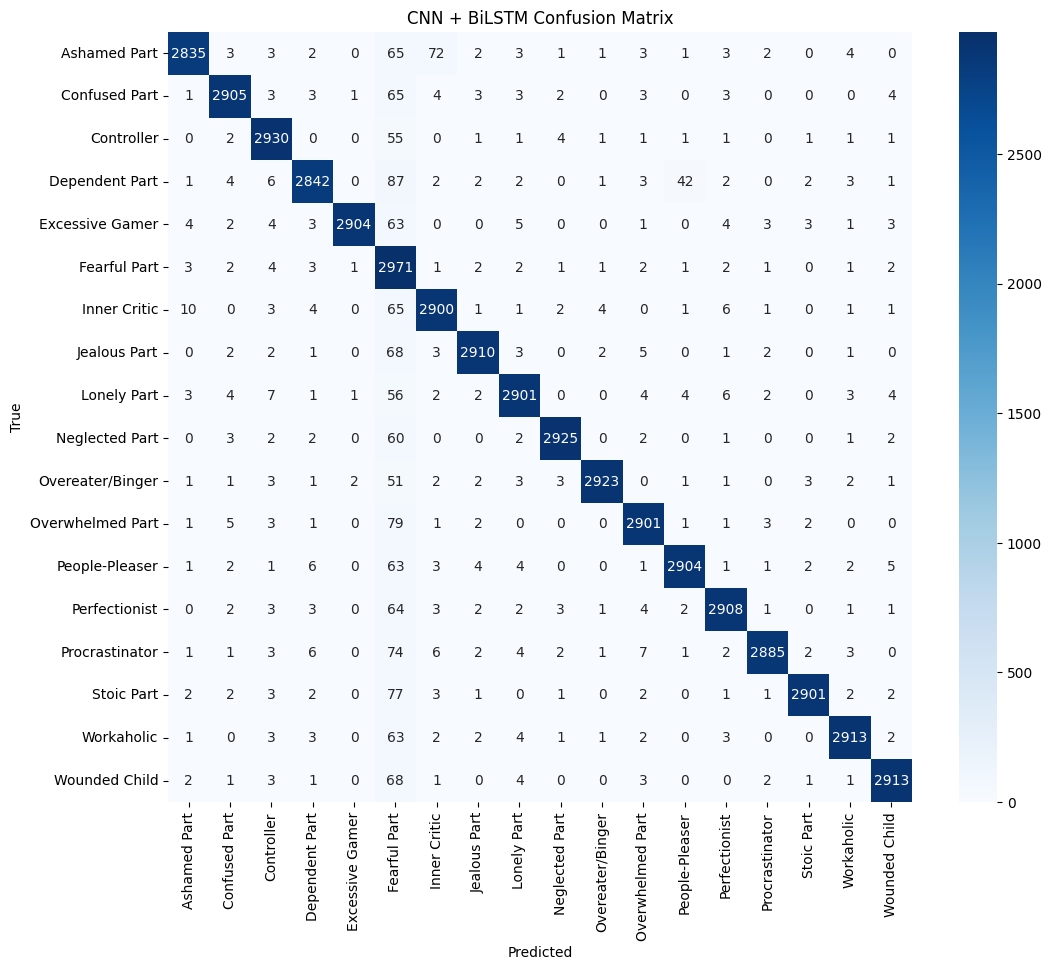


🎉 CNN + BiLSTM MODEL TRAINED & SAVED


In [ ]:
# =========================================================
# INNER CHARACTER CLASSIFICATION WITH CNN + BiLSTM
# ✅ Clean + Balanced + Augmented
# ✅ Early Stopping (BEST PRACTICE)
# =========================================================

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re
import joblib
import random
import warnings
warnings.filterwarnings("ignore")

# -----------------------------
# CONFIG
# -----------------------------
DATA_PATH = "/content/drive/MyDrive/new/ifs_high_quality_dataset.csv"
SAVE_DIR  = "/content/drive/MyDrive/new/"
SEED = 42

np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

if tf.config.list_physical_devices("GPU"):
    tf.config.optimizer.set_jit(True)
    print("✅ GPU detected & XLA enabled")

# -----------------------------
# TEXT CLEANING
# -----------------------------
def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r"[^\w\s.,!?]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# -----------------------------
# LIGHT TEXT AUGMENTATION
# -----------------------------
def augment_text(text):
    words = text.split()
    if len(words) > 4:
        n = max(1, len(words) // 4)
        idx = list(range(len(words)))
        random.shuffle(idx)
        words = [words[i] for i in idx]
    return " ".join(words)

# -----------------------------
# LOAD DATA
# -----------------------------
print("📥 Loading dataset...")
df = pd.read_csv(DATA_PATH)

df = df.rename(columns={
    "input_text": "text",
    "inner_char": "inner_character"
})

df = df[["text", "inner_character"]]
df["text"] = df["text"].apply(clean_text)

df.dropna(inplace=True)
df.drop_duplicates(subset="text", inplace=True)

print(f"Dataset size after cleaning: {df.shape}")

# -----------------------------
# BALANCE CLASSES
# -----------------------------
max_count = df["inner_character"].value_counts().max()
balanced = []

for label in df["inner_character"].unique():
    class_df = df[df["inner_character"] == label]
    if len(class_df) < max_count:
        extra = resample(
            class_df,
            replace=True,
            n_samples=max_count - len(class_df),
            random_state=SEED
        )
        extra["text"] = extra["text"].apply(augment_text)
        class_df = pd.concat([class_df, extra])
    balanced.append(class_df)

df = pd.concat(balanced).sample(frac=1, random_state=SEED)
print("✅ Dataset balanced")
print(df["inner_character"].value_counts())

# -----------------------------
# LABEL ENCODING
# -----------------------------
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["inner_character"])
num_classes = len(label_encoder.classes_)

joblib.dump(label_encoder, f"{SAVE_DIR}label_encoder.pkl")
print(f"Classes ({num_classes}): {label_encoder.classes_}")

# -----------------------------
# TRAIN / VAL / TEST SPLIT
# -----------------------------
X = df["text"].values
y = df["label"].values

X_train, X_tmp, y_train, y_tmp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=SEED
)

X_val, X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp, test_size=0.50, stratify=y_tmp, random_state=SEED
)

# -----------------------------
# TEXT VECTORIZATION
# -----------------------------
max_len = int(np.percentile([len(t.split()) for t in X_train], 95))
max_len = min(max(max_len, 20), 120)

vectorizer = layers.TextVectorization(
    max_tokens=12000,
    output_mode="int",
    output_sequence_length=max_len
)

vectorizer.adapt(X_train[:5000])
vocab_size = len(vectorizer.get_vocabulary())

print(f"✅ Vocabulary size: {vocab_size}")
print(f"✅ Max sequence length: {max_len}")

# -----------------------------
# CNN + BiLSTM MODEL
# -----------------------------
def build_cnn_lstm():
    inputs = keras.Input(shape=(1,), dtype=tf.string)

    x = vectorizer(inputs)
    x = layers.Embedding(vocab_size, 128, mask_zero=True)(x)

    # 🔹 CNN BLOCK (local patterns)
    x = layers.Conv1D(128, kernel_size=3, padding="same", activation="relu")(x)
    x = layers.MaxPooling1D(pool_size=2)(x)

    x = layers.Conv1D(128, kernel_size=5, padding="same", activation="relu")(x)
    x = layers.MaxPooling1D(pool_size=2)(x)

    # 🔹 BiLSTM BLOCK (sequence understanding)
    x = layers.Bidirectional(layers.LSTM(64))(x)

    # 🔹 CLASSIFIER
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

model = build_cnn_lstm()
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# -----------------------------
# CALLBACKS
# -----------------------------
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=4,
    min_delta=0.001,
    restore_best_weights=True,
    verbose=1
)

checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=f"{SAVE_DIR}best_cnn_lstm.keras",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

callbacks = [early_stopping, checkpoint]

# -----------------------------
# TRAINING
# -----------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=32,
    callbacks=callbacks,
    shuffle=True
)

# -----------------------------
# EVALUATION
# -----------------------------
best_model = keras.models.load_model(f"{SAVE_DIR}best_cnn_lstm.keras")

test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.2%}")

y_pred = np.argmax(best_model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# -----------------------------
# CONFUSION MATRIX
# -----------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("CNN + BiLSTM Confusion Matrix")
plt.show()

# -----------------------------
# SAVE FINAL MODEL
# -----------------------------
best_model.save(f"{SAVE_DIR}inner_character_cnn_lstm.keras")
joblib.dump(vectorizer.get_vocabulary(), f"{SAVE_DIR}vocab.pkl")

print("\n🎉 CNN + BiLSTM MODEL TRAINED & SAVED")


# ROC


📥 Reloading dataset and preprocessing data for ROC curve...
📥 Loading best model from /content/drive/MyDrive/new/best_cnn_lstm.keras...

📈 Plotting ROC curves...
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step


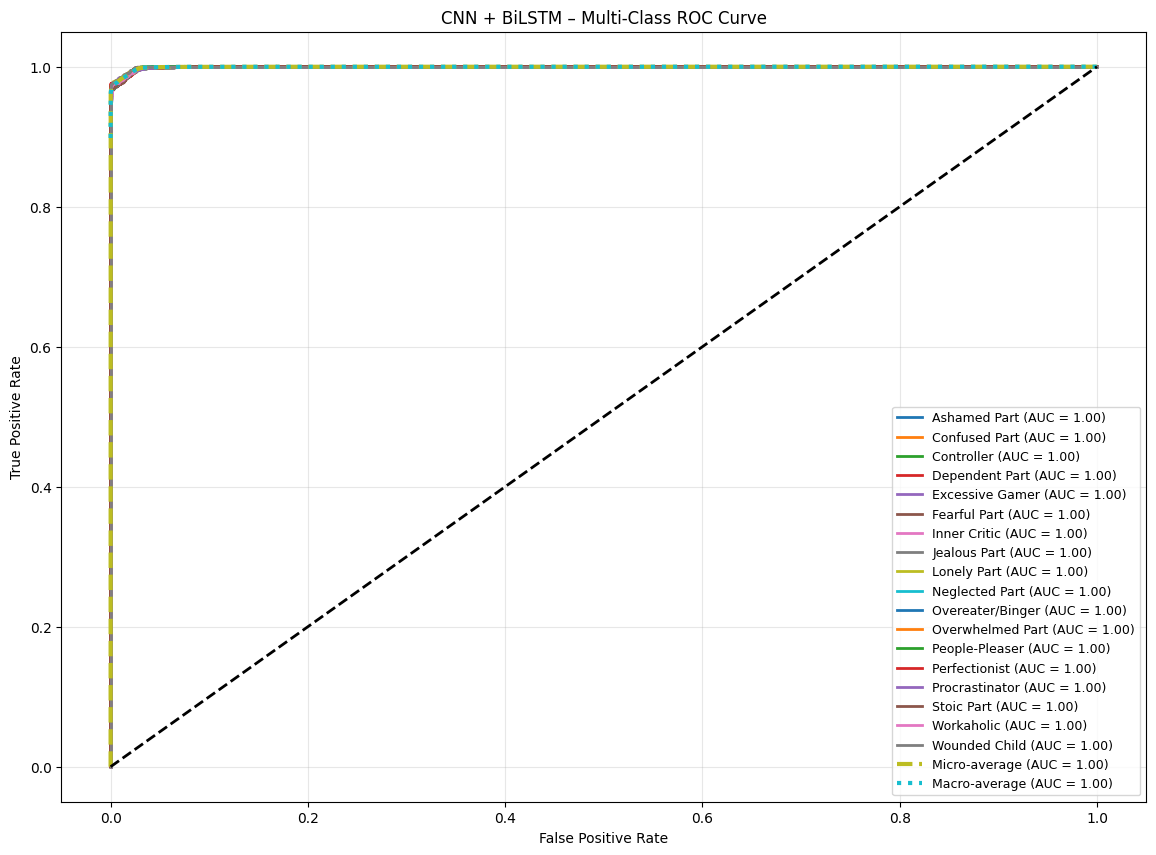

✅ ROC curves plotted successfully


In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import re
import joblib
import random
import warnings
warnings.filterwarnings("ignore")

# -----------------------------
# CONFIG (MUST MATCH TRAINING)
# -----------------------------
DATA_PATH = "/content/drive/MyDrive/new/ifs_high_quality_dataset.csv"
SAVE_DIR  = "/content/drive/MyDrive/new/"
SEED = 42

np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# -----------------------------
# TEXT CLEANING (IDENTICAL TO TRAINING)
# -----------------------------
def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r"[^\w\s.,!?]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# -----------------------------
# LOAD DATA & PREPROCESS (IDENTICAL TO TRAINING CELL V2fCIQMkVT0U)
# -----------------------------
print("\n📥 Reloading dataset and preprocessing data for ROC curve...")
df = pd.read_csv(DATA_PATH)

df = df.rename(columns={
    "input_text": "text",
    "inner_char": "inner_character"
})

df = df[["text", "inner_character"]]
df["text"] = df["text"].apply(clean_text)

df.dropna(inplace=True)
df.drop_duplicates(subset="text", inplace=True)

# -----------------------------
# LABEL ENCODING (IDENTICAL TO TRAINING CELL V2fCIQMkVT0U)
# -----------------------------
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["inner_character"])
num_classes = len(label_encoder.classes_)

# -----------------------------
# TRAIN / VAL / TEST SPLIT (IDENTICAL TO TRAINING CELL V2fCIQMkVT0U)
# -----------------------------
X = df["text"].values
y = df["label"].values

X_train, X_tmp, y_train, y_tmp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=SEED
)

X_val, X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp, test_size=0.50, stratify=y_tmp, random_state=SEED
)

# -----------------------------
# LOAD BEST MODEL
# -----------------------------
MODEL_PATH = f"{SAVE_DIR}best_cnn_lstm.keras"
print(f"📥 Loading best model from {MODEL_PATH}...")
best_model = keras.models.load_model(MODEL_PATH)

# -----------------------------
# ROC CURVE (MULTI-CLASS)
# -----------------------------
print("\n📈 Plotting ROC curves...")

# Predict probabilities
y_proba = best_model.predict(X_test)

# Binarize labels (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=np.arange(num_classes))

fpr = {}
tpr = {}
roc_auc = {}

# ROC for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average ROC
fpr["micro"], tpr["micro"], _ = roc_curve(
    y_test_bin.ravel(),
    y_proba.ravel()
)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average ROC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# -----------------------------
# PLOT ROC
# -----------------------------
plt.figure(figsize=(14, 10))

# Per-class ROC curves
for i, label in enumerate(label_encoder.classes_):
    plt.plot(
        fpr[i],
        tpr[i],
        linewidth=2,
        label=f"{label} (AUC = {roc_auc[i]:.2f})"
    )

# Micro & Macro averages
plt.plot(
    fpr["micro"],
    tpr["micro"],
    linestyle="--",
    linewidth=3,
    label=f"Micro-average (AUC = {roc_auc['micro']:.2f})"
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    linestyle=":",
    linewidth=3,
    label=f"Macro-average (AUC = {roc_auc['macro']:.2f})"
)

# Random baseline
plt.plot([0, 1], [0, 1], "k--", linewidth=2)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("CNN + BiLSTM – Multi-Class ROC Curve")
plt.legend(loc="lower right", fontsize=9)
plt.grid(alpha=0.3)
plt.show()

print("✅ ROC curves plotted successfully")


In [9]:
# =========================================================
# INNER CHARACTER CLASSIFIER – SMART EVALUATION
# CNN + BiLSTM MODEL
# FULL / PARTIAL / NOT CLASSIFIED
# =========================================================

import tensorflow as tf
import numpy as np
import joblib
import re

# -----------------------------
# PATHS (MUST MATCH TRAINING)
# -----------------------------
MODEL_PATH = "/content/drive/MyDrive/new/inner_character_cnn_lstm.keras"
LABEL_ENCODER_PATH = "/content/drive/MyDrive/new/label_encoder.pkl"

# -----------------------------
# LOAD MODEL & ENCODER
# -----------------------------
print("📥 Loading CNN + BiLSTM model and label encoder...")
model = tf.keras.models.load_model(MODEL_PATH)
label_encoder = joblib.load(LABEL_ENCODER_PATH)

classes = list(label_encoder.classes_)

print("✅ Model input shape:", model.input_shape)
print("✅ Number of classes:", len(classes))
print("✅ Classes:", classes)

# -----------------------------
# TEXT CLEANING (IDENTICAL TO TRAINING)
# -----------------------------
def clean_text(text):
    if not text:
        return ""
    text = str(text).lower()
    text = re.sub(r"[^\w\s.,!?]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# -----------------------------
# PREDICTION FUNCTION
# -----------------------------
def predict_inner_character(text, top_k=3):
    text = clean_text(text)

    # 🔴 DO NOT CHANGE — model expects tf.string with shape (batch, 1)
    input_tensor = tf.convert_to_tensor([[text]], dtype=tf.string)

    probs = model(input_tensor, training=False)[0].numpy()
    top_indices = np.argsort(probs)[-top_k:][::-1]

    predictions = []
    for idx in top_indices:
        predictions.append({
            "character": label_encoder.inverse_transform([idx])[0],
            "confidence": float(probs[idx])
        })

    return predictions, probs

# =========================================================
# TEST CASES (PSYCHOLOGICALLY DISTINCT)
# =========================================================
test_cases = {
    "Ashamed Part":
    "I often feel a deep sense of embarrassment about who I am, as if something about me is fundamentally wrong. I try to stay quiet, avoid attention, and hide parts of myself because I fear being judged, exposed, or rejected if others really see me.",

    "Confused Part":
    "My thoughts feel tangled and unclear, and I struggle to understand what I truly feel or want. When I try to make decisions, everything seems contradictory, and I end up feeling mentally stuck and uncertain.",

    "Controller":
    "I feel safest when I am in control of situations, people, and outcomes. I plan carefully, organize constantly, and become anxious or irritated when things do not go as expected or slip out of my control.",

    "Dependent Part":
    "When I am left on my own, I feel incapable and insecure. I rely heavily on others for guidance, reassurance, and direction, and I feel overwhelmed when I have to make decisions by myself.",

    "Excessive Gamer":
    "I spend many hours absorbed in video games because they allow me to escape from stress, emotional discomfort, and responsibilities. Inside the game world I feel distracted and safe, while real life feels too heavy to face.",

    "Fearful Part":
    "I live with a constant sense of fear and tension, even when there is no clear danger. My body feels on edge, my thoughts anticipate worst-case scenarios, and it is difficult for me to relax or feel safe.",

    "Inner Critic":
    "There is a relentless inner voice that judges everything I do. It highlights my mistakes, magnifies my flaws, and constantly tells me that I am weak, failing, or not good enough no matter how hard I try.",

    "Jealous Part":
    "When I see others receiving success, attention, or affection, I feel a sharp sense of envy and resentment. I compare myself to them and feel threatened, inferior, and angry about what I believe I lack.",

    "Lonely Part":
    "Even when I am surrounded by people, I feel emotionally isolated and disconnected. I long for deep connection and understanding, yet I feel unseen, misunderstood, and alone inside.",

    "Neglected Part":
    "I carry a painful feeling that my emotional needs were ignored for a long time. I learned to stop asking for care or support because it felt like no one was truly available or listening to me.",

    "Overeater/Binger":
    "When emotions become intense or uncomfortable, I turn to food for relief. I eat beyond physical hunger as a way to numb feelings, calm myself, and temporarily escape emotional pain.",

    "Overwhelmed Part":
    "My mind feels overloaded by responsibilities, expectations, and tasks. Everything feels urgent and heavy, and I struggle to focus, think clearly, or cope with the constant pressure.",

    "People-Pleaser":
    "I focus on keeping others satisfied and avoiding conflict at all costs. I suppress my own needs, opinions, and boundaries, believing that my worth depends on being liked and accepted.",

    "Perfectionist":
    "I push myself to meet extremely high standards and feel intense pressure to perform flawlessly. Any mistake feels unacceptable, and I criticize myself harshly when I fall short of perfection.",

    "Procrastinator":
    "I repeatedly delay starting important tasks even though I know the consequences. I feel stuck, overwhelmed, and ashamed, yet I continue avoiding action until pressure becomes unbearable.",

    "Stoic Part":
    "I keep my emotions tightly controlled and rarely allow myself to express vulnerability. I believe that showing feelings is unsafe, so I remain emotionally distant and guarded.",

    "Workaholic":
    "I work excessively and tie my sense of worth to productivity and achievement. Rest feels uncomfortable, and I experience guilt and anxiety whenever I am not doing something useful.",

    "Wounded Child":
    "There is a little part of me that feels perpetually hurt and vulnerable, like a child left alone with fear and sadness. I try to care for it as an adult, but the pain is still raw and sometimes overwhelms me, reminding me that the wounds I carry from long ago have not fully healed, and that small voice inside still cries for attention and safety."
}




# =========================================================
# RUN SMART TEST
# =========================================================
print("\n" + "=" * 80)
print("🧠 INNER CHARACTER MODEL – SMART CNN + BiLSTM TEST")
print("=" * 80)

full = partial = none = 0

for expected, text in test_cases.items():
    predictions, probs = predict_inner_character(text, top_k=3)

    predicted_top = predictions[0]["character"]
    top_chars = [p["character"] for p in predictions]

    if expected == predicted_top:
        status = "✅ FULLY CLASSIFIED"
        full += 1
    elif expected in top_chars:
        status = "🟡 PARTIALLY CLASSIFIED"
        partial += 1
    else:
        status = "❌ NOT CLASSIFIED"
        none += 1

    print(f"\n📝 Text: {text}")
    print(f"🎯 Expected: {expected}")
    print(f"📌 Status: {status}")

    for i, p in enumerate(predictions, 1):
        print(f"   {i}. {p['character']} → {p['confidence']:.2%}")

# =========================================================
# SUMMARY
# =========================================================
print("\n" + "=" * 80)
print("📊 FINAL EVALUATION SUMMARY")
print("=" * 80)
print(f"✅ Fully Classified: {full}")
print(f"🟡 Partially Classified: {partial}")
print(f"❌ Not Classified: {none}")
print(f"🎯 Total Tests: {len(test_cases)}")
print("=" * 80)


📥 Loading CNN + BiLSTM model and label encoder...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


✅ Model input shape: (None, 1)
✅ Number of classes: 18
✅ Classes: ['Ashamed Part', 'Confused Part', 'Controller', 'Dependent Part', 'Excessive Gamer', 'Fearful Part', 'Inner Critic', 'Jealous Part', 'Lonely Part', 'Neglected Part', 'Overeater/Binger', 'Overwhelmed Part', 'People-Pleaser', 'Perfectionist', 'Procrastinator', 'Stoic Part', 'Workaholic', 'Wounded Child']

🧠 INNER CHARACTER MODEL – SMART CNN + BiLSTM TEST

📝 Text: I often feel a deep sense of embarrassment about who I am, as if something about me is fundamentally wrong. I try to stay quiet, avoid attention, and hide parts of myself because I fear being judged, exposed, or rejected if others really see me.
🎯 Expected: Ashamed Part
📌 Status: 🟡 PARTIALLY CLASSIFIED
   1. Inner Critic → 99.58%
   2. Neglected Part → 0.14%
   3. Ashamed Part → 0.09%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: My thoughts feel tangled and unclear, and I struggle to understand what I truly feel or want. When I try to make decisions, everything seems contradictory, and I end up feeling mentally stuck and uncertain.
🎯 Expected: Confused Part
📌 Status: ✅ FULLY CLASSIFIED
   1. Confused Part → 100.00%
   2. Jealous Part → 0.00%
   3. Lonely Part → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I feel safest when I am in control of situations, people, and outcomes. I plan carefully, organize constantly, and become anxious or irritated when things do not go as expected or slip out of my control.
🎯 Expected: Controller
📌 Status: ✅ FULLY CLASSIFIED
   1. Controller → 99.87%
   2. Dependent Part → 0.04%
   3. Fearful Part → 0.02%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: When I am left on my own, I feel incapable and insecure. I rely heavily on others for guidance, reassurance, and direction, and I feel overwhelmed when I have to make decisions by myself.
🎯 Expected: Dependent Part
📌 Status: ✅ FULLY CLASSIFIED
   1. Dependent Part → 100.00%
   2. People-Pleaser → 0.00%
   3. Inner Critic → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I spend many hours absorbed in video games because they allow me to escape from stress, emotional discomfort, and responsibilities. Inside the game world I feel distracted and safe, while real life feels too heavy to face.
🎯 Expected: Excessive Gamer
📌 Status: 🟡 PARTIALLY CLASSIFIED
   1. Stoic Part → 87.69%
   2. Excessive Gamer → 10.94%
   3. Ashamed Part → 0.85%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I live with a constant sense of fear and tension, even when there is no clear danger. My body feels on edge, my thoughts anticipate worst-case scenarios, and it is difficult for me to relax or feel safe.
🎯 Expected: Fearful Part
📌 Status: ✅ FULLY CLASSIFIED
   1. Fearful Part → 100.00%
   2. Workaholic → 0.00%
   3. Excessive Gamer → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: There is a relentless inner voice that judges everything I do. It highlights my mistakes, magnifies my flaws, and constantly tells me that I am weak, failing, or not good enough no matter how hard I try.
🎯 Expected: Inner Critic
📌 Status: 🟡 PARTIALLY CLASSIFIED
   1. Perfectionist → 99.99%
   2. Inner Critic → 0.01%
   3. Ashamed Part → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: When I see others receiving success, attention, or affection, I feel a sharp sense of envy and resentment. I compare myself to them and feel threatened, inferior, and angry about what I believe I lack.
🎯 Expected: Jealous Part
📌 Status: ✅ FULLY CLASSIFIED
   1. Jealous Part → 100.00%
   2. Overwhelmed Part → 0.00%
   3. People-Pleaser → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: Even when I am surrounded by people, I feel emotionally isolated and disconnected. I long for deep connection and understanding, yet I feel unseen, misunderstood, and alone inside.
🎯 Expected: Lonely Part
📌 Status: ✅ FULLY CLASSIFIED
   1. Lonely Part → 94.26%
   2. Neglected Part → 3.29%
   3. Stoic Part → 1.83%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I carry a painful feeling that my emotional needs were ignored for a long time. I learned to stop asking for care or support because it felt like no one was truly available or listening to me.
🎯 Expected: Neglected Part
📌 Status: ✅ FULLY CLASSIFIED
   1. Neglected Part → 99.65%
   2. Stoic Part → 0.34%
   3. Procrastinator → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: When emotions become intense or uncomfortable, I turn to food for relief. I eat beyond physical hunger as a way to numb feelings, calm myself, and temporarily escape emotional pain.
🎯 Expected: Overeater/Binger
📌 Status: ❌ NOT CLASSIFIED
   1. Stoic Part → 100.00%
   2. Ashamed Part → 0.00%
   3. Neglected Part → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: My mind feels overloaded by responsibilities, expectations, and tasks. Everything feels urgent and heavy, and I struggle to focus, think clearly, or cope with the constant pressure.
🎯 Expected: Overwhelmed Part
📌 Status: ❌ NOT CLASSIFIED
   1. Excessive Gamer → 99.69%
   2. Jealous Part → 0.24%
   3. Fearful Part → 0.06%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I focus on keeping others satisfied and avoiding conflict at all costs. I suppress my own needs, opinions, and boundaries, believing that my worth depends on being liked and accepted.
🎯 Expected: People-Pleaser
📌 Status: 🟡 PARTIALLY CLASSIFIED
   1. Dependent Part → 88.92%
   2. People-Pleaser → 10.78%
   3. Jealous Part → 0.23%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I push myself to meet extremely high standards and feel intense pressure to perform flawlessly. Any mistake feels unacceptable, and I criticize myself harshly when I fall short of perfection.
🎯 Expected: Perfectionist
📌 Status: ✅ FULLY CLASSIFIED
   1. Perfectionist → 100.00%
   2. Inner Critic → 0.00%
   3. Controller → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I repeatedly delay starting important tasks even though I know the consequences. I feel stuck, overwhelmed, and ashamed, yet I continue avoiding action until pressure becomes unbearable.
🎯 Expected: Procrastinator
📌 Status: ✅ FULLY CLASSIFIED
   1. Procrastinator → 99.98%
   2. Overwhelmed Part → 0.02%
   3. Ashamed Part → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I keep my emotions tightly controlled and rarely allow myself to express vulnerability. I believe that showing feelings is unsafe, so I remain emotionally distant and guarded.
🎯 Expected: Stoic Part
📌 Status: ✅ FULLY CLASSIFIED
   1. Stoic Part → 100.00%
   2. Neglected Part → 0.00%
   3. Ashamed Part → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I work excessively and tie my sense of worth to productivity and achievement. Rest feels uncomfortable, and I experience guilt and anxiety whenever I am not doing something useful.
🎯 Expected: Workaholic
📌 Status: ✅ FULLY CLASSIFIED
   1. Workaholic → 100.00%
   2. Controller → 0.00%
   3. Procrastinator → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: There is a little part of me that feels perpetually hurt and vulnerable, like a child left alone with fear and sadness. I try to care for it as an adult, but the pain is still raw and sometimes overwhelms me, reminding me that the wounds I carry from long ago have not fully healed, and that small voice inside still cries for attention and safety.
🎯 Expected: Wounded Child
📌 Status: ❌ NOT CLASSIFIED
   1. Lonely Part → 95.44%
   2. People-Pleaser → 1.41%
   3. Jealous Part → 1.14%

📊 FINAL EVALUATION SUMMARY
✅ Fully Classified: 11
🟡 Partially Classified: 4
❌ Not Classified: 3
🎯 Total Tests: 18


In [ ]:
# =========================================================
# INNER CHARACTER CLASSIFIER – SMART EVALUATION
# CNN + BiLSTM MODEL
# TOP-5 | FULL / PARTIAL / NOT CLASSIFIED
# =========================================================

import tensorflow as tf
import numpy as np
import joblib
import re

# -----------------------------
# PATHS (MUST MATCH TRAINING)
# -----------------------------
MODEL_PATH = "/content/drive/MyDrive/new/inner_character_cnn_lstm.keras"
LABEL_ENCODER_PATH = "/content/drive/MyDrive/new/label_encoder.pkl"

# -----------------------------
# LOAD MODEL & ENCODER
# -----------------------------
print("📥 Loading CNN + BiLSTM model and label encoder...")
model = tf.keras.models.load_model(MODEL_PATH)
label_encoder = joblib.load(LABEL_ENCODER_PATH)

classes = list(label_encoder.classes_)

print("✅ Model input shape:", model.input_shape)
print("✅ Number of classes:", len(classes))
print("✅ Classes:", classes)

# -----------------------------
# TEXT CLEANING (IDENTICAL TO TRAINING)
# -----------------------------
def clean_text(text):
    if not text:
        return ""
    text = str(text).lower()
    text = re.sub(r"[^\w\s.,!?]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# -----------------------------
# PREDICTION FUNCTION (TOP-5)
# -----------------------------
def predict_inner_character(text, top_k=5):
    text = clean_text(text)

    # 🔴 DO NOT CHANGE — model expects tf.string with shape (batch, 1)
    input_tensor = tf.convert_to_tensor([[text]], dtype=tf.string)

    probs = model(input_tensor, training=False)[0].numpy()
    top_indices = np.argsort(probs)[-top_k:][::-1]

    predictions = []
    for idx in top_indices:
        predictions.append({
            "character": label_encoder.inverse_transform([idx])[0],
            "confidence": float(probs[idx])
        })

    return predictions, probs

# =========================================================
# TEST CASES
# =========================================================
test_cases = {
    "Ashamed Part": "I feel embarrassed about who I am and try to hide myself to avoid judgment.",
    "Confused Part": "My thoughts feel mixed and unclear, and I don’t know what decision to make.",
    "Controller": "I feel safe only when everything is organized and under my control.",
    "Dependent Part": "I struggle to function alone and need others to guide and reassure me.",
    "Excessive Gamer": "I escape into video games for hours to avoid dealing with real problems.",
    "Fearful Part": "I feel tense and afraid most of the time even without real danger.",
    "Inner Critic": "I constantly attack myself and focus on every mistake I make.",
    "Jealous Part": "I feel angry and insecure when others have what I want.",
    "Lonely Part": "I feel emotionally disconnected and alone even when people are around.",
    "Neglected Part": "I feel unseen and like my emotional needs never mattered.",
    "Overeater/Binger": "I eat excessively to soothe emotional discomfort.",
    "Overwhelmed Part": "I feel mentally overloaded and unable to cope with all responsibilities.",
    "People-Pleaser": "I ignore my own needs and focus on keeping others happy.",
    "Perfectionist": "I set unrealistically high standards and feel distressed when I fail.",
    "Procrastinator": "I delay starting tasks even though I know they are important.",
    "Stoic Part": "I suppress my emotions and avoid expressing how I feel.",
    "Workaholic": "I work excessively and feel guilty when I try to rest.",
    "Wounded Child": "I feel emotionally hurt, vulnerable, and unprotected like a child."
}

# =========================================================
# RUN SMART TEST
# =========================================================
print("\n" + "=" * 80)
print("🧠 INNER CHARACTER MODEL – SMART CNN + BiLSTM TEST (TOP-5)")
print("=" * 80)

full = partial = none = 0

for expected, text in test_cases.items():
    predictions, probs = predict_inner_character(text, top_k=5)

    predicted_top = predictions[0]["character"]
    top_chars = [p["character"] for p in predictions]

    if expected == predicted_top:
        status = "✅ FULLY CLASSIFIED (TOP-1)"
        full += 1
    elif expected in top_chars:
        status = "🟡 PARTIALLY CLASSIFIED (TOP-5)"
        partial += 1
    else:
        status = "❌ NOT CLASSIFIED"
        none += 1

    print(f"\n📝 Text: {text}")
    print(f"🎯 Expected: {expected}")
    print(f"📌 Status: {status}")

    for i, p in enumerate(predictions, 1):
        print(f"   {i}. {p['character']} → {p['confidence']:.2%}")

# =========================================================
# SUMMARY
# =========================================================
print("\n" + "=" * 80)
print("📊 FINAL EVALUATION SUMMARY (TOP-5)")
print("=" * 80)
print(f"✅ Fully Classified (Top-1): {full}")
print(f"🟡 Partially Classified (Top-5): {partial}")
print(f"❌ Not Classified: {none}")
print(f"🎯 Total Tests: {len(test_cases)}")
print("=" * 80)


📥 Loading CNN + BiLSTM model and label encoder...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


✅ Model input shape: (None, 1)
✅ Number of classes: 18
✅ Classes: ['Ashamed Part', 'Confused Part', 'Controller', 'Dependent Part', 'Excessive Gamer', 'Fearful Part', 'Inner Critic', 'Jealous Part', 'Lonely Part', 'Neglected Part', 'Overeater/Binger', 'Overwhelmed Part', 'People-Pleaser', 'Perfectionist', 'Procrastinator', 'Stoic Part', 'Workaholic', 'Wounded Child']

🧠 INNER CHARACTER MODEL – SMART CNN + BiLSTM TEST (TOP-5)

📝 Text: I feel embarrassed about who I am and try to hide myself to avoid judgment.
🎯 Expected: Ashamed Part
📌 Status: ✅ FULLY CLASSIFIED (TOP-1)
   1. Ashamed Part → 95.93%
   2. Inner Critic → 3.77%
   3. Procrastinator → 0.07%
   4. Lonely Part → 0.05%
   5. Confused Part → 0.03%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: My thoughts feel mixed and unclear, and I don’t know what decision to make.
🎯 Expected: Confused Part
📌 Status: ✅ FULLY CLASSIFIED (TOP-1)
   1. Confused Part → 100.00%
   2. Jealous Part → 0.00%
   3. Inner Critic → 0.00%
   4. Lonely Part → 0.00%
   5. Overeater/Binger → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I feel safe only when everything is organized and under my control.
🎯 Expected: Controller
📌 Status: ✅ FULLY CLASSIFIED (TOP-1)
   1. Controller → 56.13%
   2. Dependent Part → 8.35%
   3. Overwhelmed Part → 6.39%
   4. People-Pleaser → 5.01%
   5. Procrastinator → 4.22%

📝 Text: I struggle to function alone and need others to guide and reassure me.
🎯 Expected: Dependent Part
📌 Status: ✅ FULLY CLASSIFIED (TOP-1)
   1. Dependent Part → 99.86%
   2. Controller → 0.06%
   3. Stoic Part → 0.04%
   4. Excessive Gamer → 0.01%
   5. People-Pleaser → 0.01%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I escape into video games for hours to avoid dealing with real problems.
🎯 Expected: Excessive Gamer
📌 Status: ✅ FULLY CLASSIFIED (TOP-1)
   1. Excessive Gamer → 26.86%
   2. Procrastinator → 25.24%
   3. Fearful Part → 7.65%
   4. Jealous Part → 5.30%
   5. Stoic Part → 5.02%

📝 Text: I feel tense and afraid most of the time even without real danger.
🎯 Expected: Fearful Part
📌 Status: ✅ FULLY CLASSIFIED (TOP-1)
   1. Fearful Part → 100.00%
   2. Workaholic → 0.00%
   3. Overwhelmed Part → 0.00%
   4. Stoic Part → 0.00%
   5. Overeater/Binger → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I constantly attack myself and focus on every mistake I make.
🎯 Expected: Inner Critic
📌 Status: 🟡 PARTIALLY CLASSIFIED (TOP-5)
   1. Perfectionist → 100.00%
   2. Inner Critic → 0.00%
   3. Controller → 0.00%
   4. Lonely Part → 0.00%
   5. Fearful Part → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I feel angry and insecure when others have what I want.
🎯 Expected: Jealous Part
📌 Status: ✅ FULLY CLASSIFIED (TOP-1)
   1. Jealous Part → 100.00%
   2. People-Pleaser → 0.00%
   3. Overwhelmed Part → 0.00%
   4. Excessive Gamer → 0.00%
   5. Neglected Part → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I feel emotionally disconnected and alone even when people are around.
🎯 Expected: Lonely Part
📌 Status: ✅ FULLY CLASSIFIED (TOP-1)
   1. Lonely Part → 100.00%
   2. Stoic Part → 0.00%
   3. Perfectionist → 0.00%
   4. Excessive Gamer → 0.00%
   5. Overwhelmed Part → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I feel unseen and like my emotional needs never mattered.
🎯 Expected: Neglected Part
📌 Status: ✅ FULLY CLASSIFIED (TOP-1)
   1. Neglected Part → 100.00%
   2. Procrastinator → 0.00%
   3. Stoic Part → 0.00%
   4. Jealous Part → 0.00%
   5. People-Pleaser → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I eat excessively to soothe emotional discomfort.
🎯 Expected: Overeater/Binger
📌 Status: 🟡 PARTIALLY CLASSIFIED (TOP-5)
   1. Ashamed Part → 23.70%
   2. Overeater/Binger → 20.93%
   3. Lonely Part → 14.33%
   4. Procrastinator → 12.29%
   5. Excessive Gamer → 5.06%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I feel mentally overloaded and unable to cope with all responsibilities.
🎯 Expected: Overwhelmed Part
📌 Status: ❌ NOT CLASSIFIED
   1. Excessive Gamer → 99.96%
   2. Fearful Part → 0.02%
   3. Wounded Child → 0.01%
   4. Inner Critic → 0.00%
   5. Confused Part → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I ignore my own needs and focus on keeping others happy.
🎯 Expected: People-Pleaser
📌 Status: 🟡 PARTIALLY CLASSIFIED (TOP-5)
   1. Neglected Part → 76.92%
   2. Jealous Part → 18.48%
   3. Dependent Part → 3.21%
   4. People-Pleaser → 0.69%
   5. Wounded Child → 0.43%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I set unrealistically high standards and feel distressed when I fail.
🎯 Expected: Perfectionist
📌 Status: ✅ FULLY CLASSIFIED (TOP-1)
   1. Perfectionist → 100.00%
   2. Inner Critic → 0.00%
   3. Controller → 0.00%
   4. Fearful Part → 0.00%
   5. Lonely Part → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I delay starting tasks even though I know they are important.
🎯 Expected: Procrastinator
📌 Status: ✅ FULLY CLASSIFIED (TOP-1)
   1. Procrastinator → 100.00%
   2. Overwhelmed Part → 0.00%
   3. Ashamed Part → 0.00%
   4. Workaholic → 0.00%
   5. Neglected Part → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I suppress my emotions and avoid expressing how I feel.
🎯 Expected: Stoic Part
📌 Status: ✅ FULLY CLASSIFIED (TOP-1)
   1. Stoic Part → 100.00%
   2. Ashamed Part → 0.00%
   3. Neglected Part → 0.00%
   4. Excessive Gamer → 0.00%
   5. Overwhelmed Part → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I work excessively and feel guilty when I try to rest.
🎯 Expected: Workaholic
📌 Status: 🟡 PARTIALLY CLASSIFIED (TOP-5)
   1. Ashamed Part → 99.99%
   2. Inner Critic → 0.01%
   3. Confused Part → 0.00%
   4. Workaholic → 0.00%
   5. Lonely Part → 0.00%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



📝 Text: I feel emotionally hurt, vulnerable, and unprotected like a child.
🎯 Expected: Wounded Child
📌 Status: ❌ NOT CLASSIFIED
   1. Fearful Part → 99.98%
   2. Excessive Gamer → 0.01%
   3. Inner Critic → 0.00%
   4. Perfectionist → 0.00%
   5. Stoic Part → 0.00%

📊 FINAL EVALUATION SUMMARY (TOP-5)
✅ Fully Classified (Top-1): 12
🟡 Partially Classified (Top-5): 4
❌ Not Classified: 2
🎯 Total Tests: 18


In [1]:
# =========================================================
# INNER CHARACTER CLASSIFIER – INTERACTIVE MODE
# CNN + BiLSTM MODEL
# TOP-5 PREDICTIONS
# =========================================================

import tensorflow as tf
import numpy as np
import joblib
import re

# -----------------------------
# PATHS (MUST MATCH TRAINING)
# -----------------------------
MODEL_PATH = "/content/drive/MyDrive/new/inner_character_cnn_lstm.keras"
LABEL_ENCODER_PATH = "/content/drive/MyDrive/new/label_encoder.pkl"

# -----------------------------
# LOAD MODEL & ENCODER
# -----------------------------
print("📥 Loading CNN + BiLSTM model and label encoder...")
model = tf.keras.models.load_model(MODEL_PATH, compile=False)
label_encoder = joblib.load(LABEL_ENCODER_PATH)

classes = list(label_encoder.classes_)

print("✅ Model input shape:", model.input_shape)
print("✅ Number of classes:", len(classes))
print("✅ Classes:", classes)

# -----------------------------
# TEXT CLEANING (IDENTICAL TO TRAINING)
# -----------------------------
def clean_text(text):
    if not text:
        return ""
    text = str(text).lower()
    text = re.sub(r"[^\w\s.,!?]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# -----------------------------
# PREDICTION FUNCTION (TOP-5)
# -----------------------------
def predict_inner_character(text, top_k=5):
    text = clean_text(text)

    # 🔴 DO NOT CHANGE — model expects tf.string with shape (batch, 1)
    input_tensor = tf.convert_to_tensor([[text]], dtype=tf.string)

    probs = model(input_tensor, training=False)[0].numpy()
    top_indices = np.argsort(probs)[-top_k:][::-1]

    predictions = []
    for idx in top_indices:
        predictions.append({
            "character": label_encoder.inverse_transform([idx])[0],
            "confidence": float(probs[idx])
        })

    return predictions

# =========================================================
# INTERACTIVE LOOP
# =========================================================
print("\n" + "=" * 80)
print("🧠 INNER CHARACTER PREDICTOR – CNN + BiLSTM (TOP-5)")
print("Type 'exit' to stop")
print("=" * 80)

while True:
    user_input = input("\n📝 Enter a sentence: ").strip()

    if user_input.lower() == "exit":
        print("\n👋 Exiting classifier.")
        break

    predictions = predict_inner_character(user_input, top_k=5)

    print("\n🔮 TOP-5 PREDICTIONS")
    print("-" * 40)
    for i, p in enumerate(predictions, 1):
        print(f"{i}. {p['character']} → {p['confidence']*100:.2f}%")


📥 Loading CNN + BiLSTM model and label encoder...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


✅ Model input shape: (None, 1)
✅ Number of classes: 18
✅ Classes: ['Ashamed Part', 'Confused Part', 'Controller', 'Dependent Part', 'Excessive Gamer', 'Fearful Part', 'Inner Critic', 'Jealous Part', 'Lonely Part', 'Neglected Part', 'Overeater/Binger', 'Overwhelmed Part', 'People-Pleaser', 'Perfectionist', 'Procrastinator', 'Stoic Part', 'Workaholic', 'Wounded Child']

🧠 INNER CHARACTER PREDICTOR – CNN + BiLSTM (TOP-5)
Type 'exit' to stop

📝 Enter a sentence: Living with the voice inside me that constantly tells me I’m not enough, no matter what I achieve, has become part of my daily routine even though it’s exhausting. The more I understand this pattern, the more I see how it has influenced major, life-changing decisions in my life.

🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Inner Critic → 16.15%
2. Perfectionist → 13.80%
3. Fearful Part → 10.17%
4. Lonely Part → 9.09%
5. Jealous Part → 7.24%

📝 Enter a sentence: The wounds of the fragile child inside me, who stil

/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Wounded Child → 82.91%
2. Jealous Part → 14.52%
3. Neglected Part → 2.03%
4. Excessive Gamer → 0.24%
5. Overeater/Binger → 0.16%

📝 Enter a sentence: i feel like no one love me what ever i do no one want me 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Overwhelmed Part → 24.69%
2. Procrastinator → 14.67%
3. Lonely Part → 11.91%
4. Dependent Part → 9.77%
5. People-Pleaser → 8.66%

📝 Enter a sentence: i have to manage everything in the study no one can do his work correctly without controlling it 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Workaholic → 55.62%
2. Controller → 18.43%
3. Procrastinator → 12.47%
4. Overeater/Binger → 1.80%
5. Overwhelmed Part → 1.74%

📝 Enter a sentence: exit

👋 Exiting classifier.


In [3]:
# =========================================================
# INNER CHARACTER CLASSIFIER – INTERACTIVE MODE
# CNN + BiLSTM MODEL
# ARABIC → ENGLISH TRANSLATION SUPPORTED
# TOP-5 PREDICTIONS
# =========================================================

import tensorflow as tf
import numpy as np
import joblib
import re
!pip install googletrans==4.0.0-rc1
from googletrans import Translator

# -----------------------------
# PATHS (MUST MATCH TRAINING)
# -----------------------------
MODEL_PATH = "/content/drive/MyDrive/new/inner_character_cnn_lstm.keras"
LABEL_ENCODER_PATH = "/content/drive/MyDrive/new/label_encoder.pkl"

# -----------------------------
# LOAD MODEL & ENCODER
# -----------------------------
print("📥 Loading CNN + BiLSTM model and label encoder...")
model = tf.keras.models.load_model(MODEL_PATH, compile=False)
label_encoder = joblib.load(LABEL_ENCODER_PATH)

classes = list(label_encoder.classes_)

print("✅ Model input shape:", model.input_shape)
print("✅ Number of classes:", len(classes))
print("✅ Classes:", classes)

# -----------------------------
# TRANSLATOR
# -----------------------------
translator = Translator()

# -----------------------------
# TEXT CLEANING (IDENTICAL TO TRAINING)
# -----------------------------
def clean_text(text):
    if not text:
        return ""
    text = str(text).lower()
    text = re.sub(r"[^\w\s.,!?]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# -----------------------------
# ARABIC DETECTION
# -----------------------------
def is_arabic(text):
    return bool(re.search(r"[\u0600-\u06FF]", text))

# -----------------------------
# TRANSLATION FUNCTION
# -----------------------------
def translate_to_english(text):
    try:
        translated = translator.translate(text, src="ar", dest="en")
        return translated.text
    except Exception as e:
        print("⚠️ Translation failed, using original text")
        return text

# -----------------------------
# PREDICTION FUNCTION (TOP-5)
# -----------------------------
def predict_inner_character(text, top_k=5):
    original_text = text

    # 🔹 Detect & translate Arabic
    if is_arabic(text):
        translated_text = translate_to_english(text)
        print(f"\n🌍 Translated from Arabic \u2192 English:")
        print(f"➡️ {translated_text}")
        text = translated_text

    # 🔹 Clean text
    text = clean_text(text)

    # 🔴 DO NOT CHANGE — model expects tf.string with shape (batch, 1)
    input_tensor = tf.convert_to_tensor([[text]], dtype=tf.string)

    probs = model(input_tensor, training=False)[0].numpy()
    top_indices = np.argsort(probs)[-top_k:][::-1]

    predictions = []
    for idx in top_indices:
        predictions.append({
            "character": label_encoder.inverse_transform([idx])[0],
            "confidence": float(probs[idx])
        })

    return predictions

# =========================================================
# INTERACTIVE LOOP
# =========================================================
print("\n" + "=" * 80)
print("🧠 INNER CHARACTER PREDICTOR – CNN + BiLSTM (TOP-5)")
print("🌍 Supports Arabic & English input")
print("Type 'exit' to stop")
print("=" * 80)

while True:
    user_input = input("\n📝 Enter a sentence: ").strip()

    if user_input.lower() == "exit":
        print("\n👋 Exiting classifier.")
        break

    predictions = predict_inner_character(user_input, top_k=5)

    print("\n🔮 TOP-5 PREDICTIONS")
    print("-" * 40)
    for i, p in enumerate(predictions, 1):
        print(f"{i}. {p['character']} \u2192 {p['confidence']*100:.2f}%")


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=0e5a2e60b629f2eeb7aaa0f67a94a168d9943745eab5163f1c67568960c5fb18
  Stored in directory: /root/.cache/pip/wheels/95/0f/04/b17a72024b56a60e499ce1a6313d283ed5ba332407155bee03
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

📥 Loading CNN + BiLSTM model and label encoder...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


✅ Model input shape: (None, 1)
✅ Number of classes: 18
✅ Classes: ['Ashamed Part', 'Confused Part', 'Controller', 'Dependent Part', 'Excessive Gamer', 'Fearful Part', 'Inner Critic', 'Jealous Part', 'Lonely Part', 'Neglected Part', 'Overeater/Binger', 'Overwhelmed Part', 'People-Pleaser', 'Perfectionist', 'Procrastinator', 'Stoic Part', 'Workaholic', 'Wounded Child']

🧠 INNER CHARACTER PREDICTOR – CNN + BiLSTM (TOP-5)
🌍 Supports Arabic & English input
Type 'exit' to stop

📝 Enter a sentence: انا مهما عملت بحس انه مش كافي 

🌍 Translated from Arabic → English:
➡️ No matter what I do, I feel like it's not enough

🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Jealous Part → 29.27%
2. Confused Part → 16.17%
3. Inner Critic → 10.06%
4. Excessive Gamer → 8.53%
5. Overwhelmed Part → 5.19%

📝 Enter a sentence: دايما جوايا احساس اني لازم افضل اشتغل موقفش شغل هو الي بيخرجني من اي حاله نفسيه 

🌍 Translated from Arabic → English:
➡️ I always have a feeling inside me that I should 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Lonely Part → 99.89%
2. Perfectionist → 0.06%
3. Overwhelmed Part → 0.02%
4. Excessive Gamer → 0.01%
5. Stoic Part → 0.01%

📝 Enter a sentence: بحس اني الطفل الي جوايا ديما زعلان 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🌍 Translated from Arabic → English:
➡️ I feel like the child inside me is always sad

🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Wounded Child → 74.44%
2. Neglected Part → 8.96%
3. Procrastinator → 8.14%
4. Excessive Gamer → 3.62%
5. Jealous Part → 2.44%

📝 Enter a sentence: ديما بحس اني مستبعده محدش عايز يتكلم معايا 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🌍 Translated from Arabic → English:
➡️ I always feel excluded and no one wants to talk to me

🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Lonely Part → 85.77%
2. Overwhelmed Part → 3.82%
3. Excessive Gamer → 1.78%
4. Jealous Part → 1.71%
5. Ashamed Part → 1.08%

📝 Enter a sentence: لما أقابل تحديات، أنا دايماً فاشل وتعبان من الإحساس ده.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🌍 Translated from Arabic → English:
➡️ When I face challenges, I always fail and get tired of this feeling.

🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Inner Critic → 87.25%
2. Perfectionist → 4.11%
3. Ashamed Part → 2.02%
4. Neglected Part → 1.69%
5. Dependent Part → 1.20%

📝 Enter a sentence: كل ما يبقي في حاجه اجبية عملتها دايما بحس انه مش كفاية 

🌍 Translated from Arabic → English:
➡️ Every time there is something obligatory that I did, I always feel that it is not enough


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Fearful Part → 36.53%
2. Procrastinator → 10.24%
3. Excessive Gamer → 9.50%
4. Overwhelmed Part → 5.88%
5. Perfectionist → 5.50%

📝 Enter a sentence: بخاف ان يحصل حاجه مش مترتب لها 

🌍 Translated from Arabic → English:
➡️ I'm afraid that something unplanned will happen


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Fearful Part → 100.00%
2. Excessive Gamer → 0.00%
3. Workaholic → 0.00%
4. Stoic Part → 0.00%
5. Overwhelmed Part → 0.00%

📝 Enter a sentence: بحس ان الحاجه الواحيده الي بطلعني من اي ضغت هو اني العب 

🌍 Translated from Arabic → English:
➡️ I feel that the only thing that relieves me of any pressure is to play


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Overwhelmed Part → 67.97%
2. Procrastinator → 16.53%
3. Ashamed Part → 2.42%
4. Jealous Part → 2.13%
5. Lonely Part → 1.63%

📝 Enter a sentence: العب هو اكتر حاجه بطلعني من اي تفكير 

🌍 Translated from Arabic → English:
➡️ Playing is the thing that takes me away from any thought


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Procrastinator → 24.83%
2. Excessive Gamer → 11.83%
3. Jealous Part → 9.76%
4. Overwhelmed Part → 7.55%
5. Dependent Part → 5.51%

📝 Enter a sentence: بقعد افكر كتير في حاجات ممكن تحصل و ممكن متحصلش 

🌍 Translated from Arabic → English:
➡️ I think a lot about things that might happen and might not happen


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Procrastinator → 23.00%
2. Excessive Gamer → 19.48%
3. Jealous Part → 7.53%
4. Dependent Part → 7.26%
5. Wounded Child → 5.63%

📝 Enter a sentence: التفكير الكتير بيعصبني 

🌍 Translated from Arabic → English:
➡️ Thinking too much makes me nervous


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Overwhelmed Part → 100.00%
2. Ashamed Part → 0.00%
3. Procrastinator → 0.00%
4. Fearful Part → 0.00%
5. Perfectionist → 0.00%

📝 Enter a sentence: بقعد افكر في الماضي و افكر في حاجات كتيره بجد بتتعبني 

🌍 Translated from Arabic → English:
➡️ I keep thinking about the past and thinking about many things that really tire me out


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Wounded Child → 19.44%
2. Procrastinator → 15.27%
3. People-Pleaser → 12.23%
4. Jealous Part → 9.69%
5. Neglected Part → 7.26%

📝 Enter a sentence: exit

👋 Exiting classifier.


In [4]:
# =========================================================
# INNER CHARACTER CLASSIFIER – INTERACTIVE MODE
# CNN + BiLSTM MODEL
# ARABIC → ENGLISH TRANSLATION SUPPORTED
# TOP-5 PREDICTIONS
# =========================================================

import tensorflow as tf
import numpy as np
import joblib
import re
!pip install googletrans==4.0.0-rc1
from googletrans import Translator

# -----------------------------
# PATHS (MUST MATCH TRAINING)
# -----------------------------
MODEL_PATH = "/content/drive/MyDrive/new/inner_character_cnn_lstm.keras"
LABEL_ENCODER_PATH = "/content/drive/MyDrive/new/label_encoder.pkl"

# -----------------------------
# LOAD MODEL & ENCODER
# -----------------------------
print("📥 Loading CNN + BiLSTM model and label encoder...")
model = tf.keras.models.load_model(MODEL_PATH, compile=False)
label_encoder = joblib.load(LABEL_ENCODER_PATH)

classes = list(label_encoder.classes_)

print("✅ Model input shape:", model.input_shape)
print("✅ Number of classes:", len(classes))
print("✅ Classes:", classes)

# -----------------------------
# TRANSLATOR
# -----------------------------
translator = Translator()

# -----------------------------
# TEXT CLEANING (IDENTICAL TO TRAINING)
# -----------------------------
def clean_text(text):
    if not text:
        return ""
    text = str(text).lower()
    text = re.sub(r"[^\w\s.,!?]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# -----------------------------
# ARABIC DETECTION
# -----------------------------
def is_arabic(text):
    return bool(re.search(r"[\u0600-\u06FF]", text))

# -----------------------------
# TRANSLATION FUNCTION
# -----------------------------
def translate_to_english(text):
    try:
        translated = translator.translate(text, src="ar", dest="en")
        return translated.text
    except Exception as e:
        print("⚠️ Translation failed, using original text")
        return text

# -----------------------------
# PREDICTION FUNCTION (TOP-5)
# -----------------------------
def predict_inner_character(text, top_k=5):
    original_text = text

    # 🔹 Detect & translate Arabic
    if is_arabic(text):
        translated_text = translate_to_english(text)
        print(f"\n🌍 Translated from Arabic \u2192 English:")
        print(f"➡️ {translated_text}")
        text = translated_text

    # 🔹 Clean text
    text = clean_text(text)

    # 🔴 DO NOT CHANGE — model expects tf.string with shape (batch, 1)
    input_tensor = tf.convert_to_tensor([[text]], dtype=tf.string)

    probs = model(input_tensor, training=False)[0].numpy()
    top_indices = np.argsort(probs)[-top_k:][::-1]

    predictions = []
    for idx in top_indices:
        predictions.append({
            "character": label_encoder.inverse_transform([idx])[0],
            "confidence": float(probs[idx])
        })

    return predictions

# =========================================================
# INTERACTIVE LOOP
# =========================================================
print("\n" + "=" * 80)
print("🧠 INNER CHARACTER PREDICTOR – CNN + BiLSTM (TOP-5)")
print("🌍 Supports Arabic & English input")
print("Type 'exit' to stop")
print("=" * 80)

while True:
    user_input = input("\n📝 Enter a sentence: ").strip()

    if user_input.lower() == "exit":
        print("\n👋 Exiting classifier.")
        break

    predictions = predict_inner_character(user_input, top_k=5)

    print("\n🔮 TOP-5 PREDICTIONS")
    print("-" * 40)
    for i, p in enumerate(predictions, 1):
        print(f"{i}. {p['character']} \u2192 {p['confidence']*100:.2f}%")


📥 Loading CNN + BiLSTM model and label encoder...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


✅ Model input shape: (None, 1)
✅ Number of classes: 18
✅ Classes: ['Ashamed Part', 'Confused Part', 'Controller', 'Dependent Part', 'Excessive Gamer', 'Fearful Part', 'Inner Critic', 'Jealous Part', 'Lonely Part', 'Neglected Part', 'Overeater/Binger', 'Overwhelmed Part', 'People-Pleaser', 'Perfectionist', 'Procrastinator', 'Stoic Part', 'Workaholic', 'Wounded Child']

🧠 INNER CHARACTER PREDICTOR – CNN + BiLSTM (TOP-5)
🌍 Supports Arabic & English input
Type 'exit' to stop

📝 Enter a sentence: بطريقة ما مفيش حاجة كويسة كفاية وخطر مرتبطين عندي.

🌍 Translated from Arabic → English:
➡️ Somehow nothing is good enough and there is no danger attached to me.

🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Inner Critic → 96.14%
2. Perfectionist → 2.37%
3. Fearful Part → 1.23%
4. Excessive Gamer → 0.10%
5. Ashamed Part → 0.08%

📝 Enter a sentence: الاتصال بين لازم يكون مش فيه أي عيب ومشكلات ثقة بقى أوضح بالنسبالي.

🌍 Translated from Arabic → English:
➡️ The communication between 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Controller → 99.97%
2. Dependent Part → 0.01%
3. People-Pleaser → 0.01%
4. Confused Part → 0.00%
5. Overwhelmed Part → 0.00%

📝 Enter a sentence: لما بحس إني الدقة مهمة، ده بيجي ببعمل فوضى في كل حاجة وبيأثِّر على حياتي اليومية.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🌍 Translated from Arabic → English:
➡️ When I feel that precision is important, I make a mess of everything and affect my daily life.

🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Perfectionist → 100.00%
2. Inner Critic → 0.00%
3. Controller → 0.00%
4. Fearful Part → 0.00%
5. Lonely Part → 0.00%

📝 Enter a sentence: في أماكن مش معتاد عليها، بَنيَّت حياتي على بِرضِي الناس بس الوعي هو أول خطوة.

🌍 Translated from Arabic → English:
➡️ In places I am not accustomed to, I built my life on people’s approval, but awareness is the first step.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🔮 TOP-5 PREDICTIONS
----------------------------------------
1. People-Pleaser → 100.00%
2. Dependent Part → 0.00%
3. Lonely Part → 0.00%
4. Wounded Child → 0.00%
5. Procrastinator → 0.00%

📝 Enter a sentence: لما بأخد قرارات، بضحِّي باحتياجاتي هو وضعي الافتراضي.

🌍 Translated from Arabic → English:
➡️ When I make decisions, sacrificing my needs is my default mode.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🔮 TOP-5 PREDICTIONS
----------------------------------------
1. People-Pleaser → 100.00%
2. Dependent Part → 0.00%
3. Lonely Part → 0.00%
4. Jealous Part → 0.00%
5. Overeater/Binger → 0.00%

📝 Enter a sentence: أحياناً إصراري على محتاج نظام بيسبب مشاكل وبيحتاج اهتمام دائم.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🌍 Translated from Arabic → English:
➡️ Sometimes my insistence on a system causes problems and requires constant attention.

🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Controller → 100.00%
2. Dependent Part → 0.00%
3. Workaholic → 0.00%
4. Confused Part → 0.00%
5. People-Pleaser → 0.00%

📝 Enter a sentence: لما أكون تعبان، بحس بالأمان لما أنا مش بظهر مشاعري مع إنِّي مش عايز يكون كده.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🌍 Translated from Arabic → English:
➡️ When I'm tired, I feel safe when I don't show my emotions even though I don't want it to be that way.

🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Stoic Part → 99.95%
2. Ashamed Part → 0.02%
3. Neglected Part → 0.01%
4. Excessive Gamer → 0.01%
5. Overwhelmed Part → 0.00%

📝 Enter a sentence: في المواقف الاجتماعية، بصراحة شديدة، مش متخيل حياتي من غير بستخدم الشغل في التهرب مع إنِّي مش عايز يكون كده.

🌍 Translated from Arabic → English:
➡️ In social situations, quite frankly, I can't imagine my life without using work to escape, even though I don't want that to be the case.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(



🔮 TOP-5 PREDICTIONS
----------------------------------------
1. Workaholic → 100.00%
2. Controller → 0.00%
3. Procrastinator → 0.00%
4. Overeater/Binger → 0.00%
5. Lonely Part → 0.00%

📝 Enter a sentence: exit

👋 Exiting classifier.
